<a href="https://colab.research.google.com/github/dindahanifa/analisis_pengujian/blob/main/K_Nearest_Neighbors_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EKSPERIMEN 1: IMPLEMENTASI KNN PADA DATA NUMERIK (IRIS DATASET)**

**Import Library**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier # Added import for KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# Define 'data' DataFrame using the loaded Iris features and feature names
data = pd.DataFrame(X, columns=iris.feature_names)

print("Preview data:")
display(data.head())

print("\nInfo kolom:")
data.info() # Call info() directly

print("\nChecking for missing values:")
print(data.isnull().sum())

print("\nPreview data (all features):")
display(data.head())

print("\nDescriptive statistics:")
display(data.describe())

Preview data:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Info kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB

Checking for missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Preview data (all features):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Descriptive statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Split Data**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nX_train (5 baris pertama):")
print(X_train[:5])
print("\nX_test (5 baris pertama):")
print(X_test[:5])
print("\ny_train (5 elemen pertama):")
print(y_train[:5])
print("\ny_test (5 elemen pertama):")
print(y_test[:5])


X_train (5 baris pertama):
[[4.4 2.9 1.4 0.2]
 [4.9 2.5 4.5 1.7]
 [6.8 2.8 4.8 1.4]
 [4.9 3.1 1.5 0.1]
 [5.5 2.5 4.  1.3]]

X_test (5 baris pertama):
[[4.4 3.  1.3 0.2]
 [6.1 3.  4.9 1.8]
 [4.9 2.4 3.3 1. ]
 [5.  2.3 3.3 1. ]
 [4.4 3.2 1.3 0.2]]

y_train (5 elemen pertama):
[0 2 1 0 1]

y_test (5 elemen pertama):
[0 2 1 1 0]


**Standardisasi**

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Latih Model**

In [7]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

**Evaluasi Model**

Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



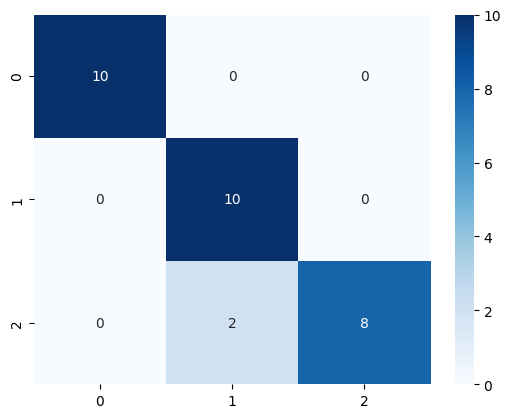

In [8]:
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

**EKSPERIMEN 2: PENGARUH NORMALISASI DATA (DATA SEDERHANA)**

Menampilkan data nya

In [9]:
data = pd.DataFrame({
    'Data': ['A', 'B', 'C'],
    'Tinggi': [160, 170, 180],
    'Berat': [50, 65, 80],
    'Kelas': ['Ringan', 'Normal', 'Berat']
})

uji = np.array([168, 60])

Hitung jarak Euclidean tanpa normalisasi.

In [10]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

data['Jarak (tanpa normalisasi)'] = [
    euclidean_distance(uji, data.loc[i, ['Tinggi', 'Berat']].values)
    for i in range(len(data))
]

print("=== Jarak Euclidean tanpa normalisasi ===")
print(data[['Data', 'Jarak (tanpa normalisasi)', 'Kelas']], '\n')

=== Jarak Euclidean tanpa normalisasi ===
  Data  Jarak (tanpa normalisasi)   Kelas
0    A                  12.806248  Ringan
1    B                   5.385165  Normal
2    C                  23.323808   Berat 



Normalisasi dengan Min–Max.

In [11]:
min_tinggi, max_tinggi = data['Tinggi'].min(), data['Tinggi'].max()
min_berat, max_berat = data['Berat'].min(), data['Berat'].max()

data['Tinggi_norm'] = (data['Tinggi'] - min_tinggi) / (max_tinggi - min_tinggi)
data['Berat_norm'] = (data['Berat'] - min_berat) / (max_berat - min_berat)

uji_norm = np.array([
    (uji[0] - min_tinggi) / (max_tinggi - min_tinggi),
    (uji[1] - min_berat) / (max_berat - min_berat)
])

data['Jarak (normalisasi)'] = [
    euclidean_distance(uji_norm, data.loc[i, ['Tinggi_norm', 'Berat_norm']].values)
    for i in range(len(data))
]

print("=== Jarak Euclidean dengan normalisasi Min–Max ===")
print(data[['Data', 'Jarak (normalisasi)', 'Kelas']], '\n')

=== Jarak Euclidean dengan normalisasi Min–Max ===
  Data  Jarak (normalisasi)   Kelas
0    A             0.520683  Ringan
1    B             0.194365  Normal
2    C             0.896908   Berat 



Bandingkan hasil klasifikasi dengan k=1 dan k=3.

In [12]:
def knn_classify(df, k, col_jarak):
    sorted_df = df.sort_values(by=col_jarak)
    nearest = sorted_df.head(k)
    return nearest['Kelas'].mode()[0]

kelas_k1_tanpa_norm = knn_classify(data, 1, 'Jarak (tanpa normalisasi)')
kelas_k3_tanpa_norm = knn_classify(data, 3, 'Jarak (tanpa normalisasi)')

kelas_k1_norm = knn_classify(data, 1, 'Jarak (normalisasi)')
kelas_k3_norm = knn_classify(data, 3, 'Jarak (normalisasi)')

print("=== Hasil klasifikasi ===")
print(f"k=1 tanpa normalisasi: {kelas_k1_tanpa_norm}")
print(f"k=3 tanpa normalisasi: {kelas_k3_tanpa_norm}")
print(f"k=1 dengan normalisasi: {kelas_k1_norm}")
print(f"k=3 dengan normalisasi: {kelas_k3_norm}\n")

=== Hasil klasifikasi ===
k=1 tanpa normalisasi: Normal
k=3 tanpa normalisasi: Berat
k=1 dengan normalisasi: Normal
k=3 dengan normalisasi: Berat



Jelaskan efek normalisasi terhadap hasil jarak.

In [13]:
print("Efek normalisasi:")
print("- Normalisasi membuat skala fitur menjadi seimbang,")
print("  sehingga fitur dengan nilai besar (misalnya tinggi) tidak mendominasi jarak.")
print("- Setelah normalisasi, pengaruh kedua fitur (tinggi dan berat) menjadi proporsional.")

Efek normalisasi:
- Normalisasi membuat skala fitur menjadi seimbang,
  sehingga fitur dengan nilai besar (misalnya tinggi) tidak mendominasi jarak.
- Setelah normalisasi, pengaruh kedua fitur (tinggi dan berat) menjadi proporsional.


**EKSPERIMEN 3: STUDI KASUS KLASIFIKASI PELANGGAN**

**Import Library**

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier # Added import for KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

In [25]:
data_customer = pd.read_csv('customer_data.csv')

# Assuming the last column is the target variable (y) and the rest are features (X)
X = data_customer.iloc[:, :-1].values
y = data_customer.iloc[:, -1].values



In [22]:
# Define 'data' DataFrame using the loaded customer features
data = pd.DataFrame(X, columns=data_customer.columns[:-1])

print("Preview data:")
display(data.head())

print("\nInfo kolom:")
data.info() # Call info() directly

print("\nChecking for missing values:")
print(data.isnull().sum())

print("\nPreview data (all features):")
display(data.head())

print("\nDescriptive statistics:")
display(data.describe())

NameError: name 'data_customer' is not defined

**Split Data Pelanggan**

In [21]:
X_train_customer, X_test_customer, y_train_customer, y_test_customer = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nX_train_customer (5 baris pertama):")
print(X_train_customer[:5])
print("Shape of X_train_customer:", X_train_customer.shape)
print("\nX_test_customer (5 baris pertama):")
print(X_test_customer[:5])
print("Shape of X_test_customer:", X_test_customer.shape)
print("\ny_train_customer (5 elemen pertama):")
print(y_train_customer[:5])
print("Shape of y_train_customer:", y_train_customer.shape)
print("\ny_test_customer (5 elemen pertama):")
print(y_test_customer[:5])
print("Shape of y_test_customer:", y_test_customer.shape)


X_train_customer (5 baris pertama):
[[4.4 2.9 1.4 0.2]
 [4.9 2.5 4.5 1.7]
 [6.8 2.8 4.8 1.4]
 [4.9 3.1 1.5 0.1]
 [5.5 2.5 4.  1.3]]
Shape of X_train_customer: (120, 4)

X_test_customer (5 baris pertama):
[[4.4 3.  1.3 0.2]
 [6.1 3.  4.9 1.8]
 [4.9 2.4 3.3 1. ]
 [5.  2.3 3.3 1. ]
 [4.4 3.2 1.3 0.2]]
Shape of X_test_customer: (30, 4)

y_train_customer (5 elemen pertama):
[0 2 1 0 1]
Shape of y_train_customer: (120,)

y_test_customer (5 elemen pertama):
[0 2 1 1 0]
Shape of y_test_customer: (30,)


**Normalisasi Data Pelanggan**

In [26]:
from sklearn.preprocessing import StandardScaler

scaler_customer = StandardScaler()
X_train_customer_scaled = scaler_customer.fit_transform(X_train_customer)
X_test_customer_scaled = scaler_customer.transform(X_test_customer)

print("\nX_train_customer_scaled (5 baris pertama):")
print(X_train_customer_scaled[:5])
print("\nX_test_customer_scaled (5 baris pertama):")
print(X_test_customer_scaled[:5])


X_train_customer_scaled (5 baris pertama):
[[-1.72156775 -0.33210111 -1.34572231 -1.32327558]
 [-1.12449223 -1.22765467  0.41450518  0.6517626 ]
 [ 1.14439475 -0.5559895   0.58484978  0.25675496]
 [-1.12449223  0.11567567 -1.28894078 -1.45494479]
 [-0.40800161 -1.22765467  0.13059752  0.12508575]]

X_test_customer_scaled (5 baris pertama):
[[-1.72156775 -0.10821272 -1.40250384 -1.32327558]
 [ 0.30848902 -0.10821272  0.64163131  0.78343181]
 [-1.12449223 -1.45154306 -0.2668732  -0.26992188]
 [-1.00507713 -1.67543145 -0.2668732  -0.26992188]
 [-1.72156775  0.33956406 -1.40250384 -1.32327558]]


Latih KNN dengan beberapa nilai k (3, 5, 7, 9).

In [27]:
k_values = [3, 5, 7, 9]

for k in k_values:
    print(f"\nTraining KNN model with k = {k}")
    knn_customer = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_customer.fit(X_train_customer_scaled, y_train_customer)
    print(f"Model KNN with k={k} trained successfully.")


Training KNN model with k = 3
Model KNN with k=3 trained successfully.

Training KNN model with k = 5
Model KNN with k=5 trained successfully.

Training KNN model with k = 7
Model KNN with k=7 trained successfully.

Training KNN model with k = 9
Model KNN with k=9 trained successfully.


In [28]:
k_values = [3, 5, 7, 9]
accuracies = [] # List to store accuracies

for k in k_values:
    print(f"\nTraining KNN model with k = {k}")
    knn_customer = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_customer.fit(X_train_customer_scaled, y_train_customer)
    print(f"Model KNN with k={k} trained successfully.")

    # Predict on the test set
    y_pred_customer = knn_customer.predict(X_test_customer_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_customer, y_pred_customer)
    accuracies.append((k, accuracy))
    print(f"Accuracy for k={k}: {accuracy:.4f}")

print("\nAll accuracies:")
for k_val, acc in accuracies:
    print(f"k={k_val}, Accuracy={acc:.4f}")


Training KNN model with k = 3
Model KNN with k=3 trained successfully.
Accuracy for k=3: 0.9333

Training KNN model with k = 5
Model KNN with k=5 trained successfully.
Accuracy for k=5: 0.9333

Training KNN model with k = 7
Model KNN with k=7 trained successfully.
Accuracy for k=7: 0.9667

Training KNN model with k = 9
Model KNN with k=9 trained successfully.
Accuracy for k=9: 0.9667

All accuracies:
k=3, Accuracy=0.9333
k=5, Accuracy=0.9333
k=7, Accuracy=0.9667
k=9, Accuracy=0.9667


Evaluasi model dengan accuracy, precision, recall, F1-score.

=== Evaluasi Model KNN dengan k=9 ===
Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



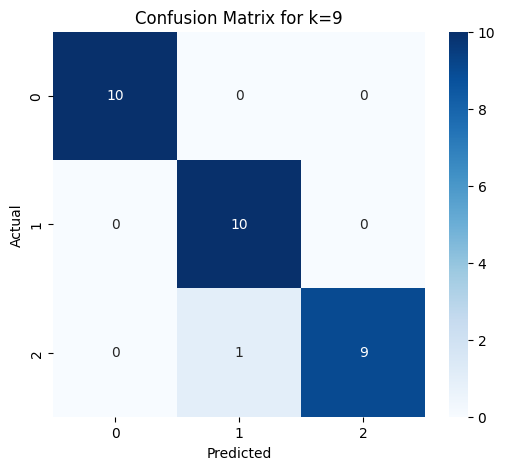

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Assuming knn_best was already trained with k=9 in a previous step
# If not, it would need to be re-trained:
knn_best = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn_best.fit(X_train_customer_scaled, y_train_customer)

y_pred_best = knn_best.predict(X_test_customer_scaled)

print("=== Evaluasi Model KNN dengan k=9 ===")
print("Accuracy:", accuracy_score(y_test_customer, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test_customer, y_pred_best))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_customer, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for k=9')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

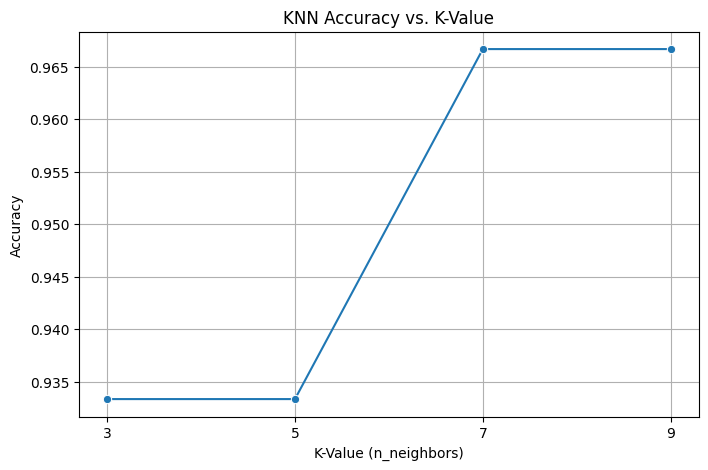

In [30]:
k_values_plot = [item[0] for item in accuracies]
accuracy_values_plot = [item[1] for item in accuracies]

plt.figure(figsize=(8, 5))
sns.lineplot(x=k_values_plot, y=accuracy_values_plot, marker='o')
plt.title('KNN Accuracy vs. K-Value')
plt.xlabel('K-Value (n_neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values_plot)
plt.grid(True)
plt.show()
